

---
# **Proyecto 1 – Relación Minutos Ingreso**
---
# **Universidad EAN**
##**Machine Learning 1**
##**Guía 1 Actividad 1**
Presentado por


María Camila Tarazona Nieto

Leyla Rocío Becerra Barajas

El problema planteado implica analizar si existe alguna relación entre dos variables clave en el negocio de una empresa de telecomunicaciones: el total de minutos usados por los clientes y los ingresos totales generados por esos clientes. Esta relación puede ser fundamental para comprender el comportamiento de los clientes y desarrollar estrategias efectivas de mejora de productos, publicidad y toma de decisiones.

Para abordar este problema, se dispone de un conjunto de datos llamado Credito_dias.csv, que contiene varias variables relevantes, incluyendo totrev (ingresos del cliente) y totmou (total de minutos usados por el cliente), entre otras.

Dado que el análisis manual de una gran cantidad de clientes no es práctico, se propone utilizar programación y análisis de datos para extraer información valiosa de manera rápida y precisa. Se puede emplear técnicas de visualización y modelado de datos para explorar la relación entre totrev y totmou, lo que permitirá identificar patrones y tendencias que pueden no ser evidentes a simple vista.

Al comprender la relación entre el uso de minutos y los ingresos generados, la empresa podrá tomar decisiones informadas sobre cómo optimizar sus servicios y estrategias comerciales para maximizar los ingresos y mejorar la satisfacción del cliente.

---
# **Librerías**
---
Instalación de paquetes, importar las librerías necesarias y cargar la base de datos

In [10]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns

---
# **Versiones**
---
Este documento fue realizado con las siguientes versiones:

- Python 3.10.12
- Pandas 1.5.3
- Matplotlib 3.8

In [11]:
#Versiones actuales
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)

Python 3.10.12
NumPy 1.25.2
Pandas 2.0.3


---
# **Base de datos**
---

## **URL Github**

Inicialmente se carga la base de datos.  Debido a que la misma se encuentra en un repositorio de Github, se designa una variable para almacenar el URL del repositorio.

In [12]:
url='https://raw.githubusercontent.com/lrbecerrab/ML1/main/Entregas/Guia1/Credito_dias.csv'

## **Uso de un dataframe (pandas)**

Se crea una estructura de datos "dataframe" de la librería [pandas](https://https://pandas.pydata.org/) la cual facilita el análisis de los datos, puesto que  ya cuenta con funciones implementadas para ello.

In [13]:
df = pd.read_csv(url)
df

,totmou,totrev,creditcd,eqpdays,Customer_ID
0,7269.0,906.58,Y,371,1082423
1,13552.0,1172.25,N,83,1069232
2,4152.0,577.39,Y,675,1031705
3,1863.0,294.26,Y,218,1089806
4,4155.0,433.16,N,222,1076695
...,...,...,...,...,...
9995,2570.0,484.31,Y,611,1027614
9996,2105.0,583.36,Y,1243,1098422
9997,3690.0,294.29,Y,212,1096497
9998,3333.0,233.08,Y,290,1087248


---
# **Análisis exploratorio de los datos**
---

Se realiza una exploración inicial de los datos de la base de datos para familiarizarse con la información disponible, entender los tipos de datos presentes y obtener una visión general de la cantidad de registros disponibles.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   totmou       10000 non-null  float64
 1   totrev       10000 non-null  float64
 2   creditcd     9848 non-null   object 
 3   eqpdays      10000 non-null  int64  
 4   Customer_ID  10000 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB


##**Identificación de variables**

In [15]:
df.columns

Index(['totmou', 'totrev', 'creditcd', 'eqpdays', 'Customer_ID'], dtype='object')

##**Estadísticas principales**

Se explora el archivo revisando el nombre, el tipo de información y cantidad de registros con valores nulos para cada variable.

In [16]:
# Exploración inicial de los datos - valores estadísticos totales calculados a las variables numéricas
df.describe()

,totmou,totrev,eqpdays,Customer_ID
count,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,7692.804866,1042.133807,386.794500,1.049965e+06
std,8657.917883,857.144895,252.720196,2.879424e+04
min,0.000000,11.100000,-5.000000,1.000014e+06
25%,2576.000000,526.787500,210.000000,1.025053e+06
50%,5262.000000,820.235000,338.000000,1.049652e+06
75%,9823.250000,1272.975000,522.000000,1.074798e+06
max,163264.176700,13426.600000,1823.000000,1.099992e+06


## **Variables numéricas**

###**totrev**

Es una variable numérica que almacena los ingresos del cliente

In [17]:
#Estadísticas de la variable
df['totrev'].describe()

count    10000.000000
mean      1042.133807
std        857.144895
min         11.100000
25%        526.787500
50%        820.235000
75%       1272.975000
max      13426.600000
Name: totrev, dtype: float64

<Axes: >

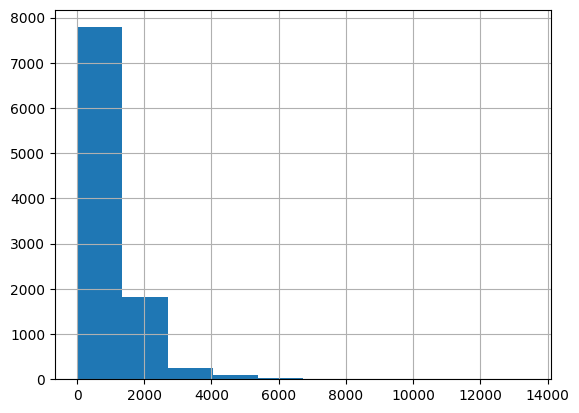

In [18]:
df['totrev'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7c9c87088430>,
 'caps': [<matplotlib.lines.Line2D at 0x7c9c87088970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c9c87088190>],
 'medians': [<matplotlib.lines.Line2D at 0x7c9c87088eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c9c87089150>],
 'means': []}

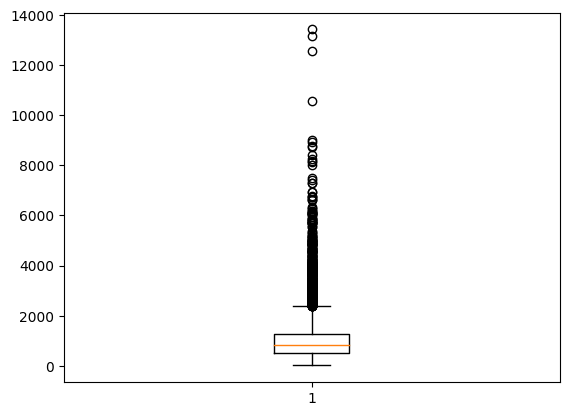

In [19]:
plt.boxplot(x=df['totrev'])

###**totmou**

Es una variable numérica que almacena el total de minutos usados por el cliente.

In [20]:
#Estadísticas de la variable
df['totmou'].describe()

count     10000.000000
mean       7692.804866
std        8657.917883
min           0.000000
25%        2576.000000
50%        5262.000000
75%        9823.250000
max      163264.176700
Name: totmou, dtype: float64

<Axes: >

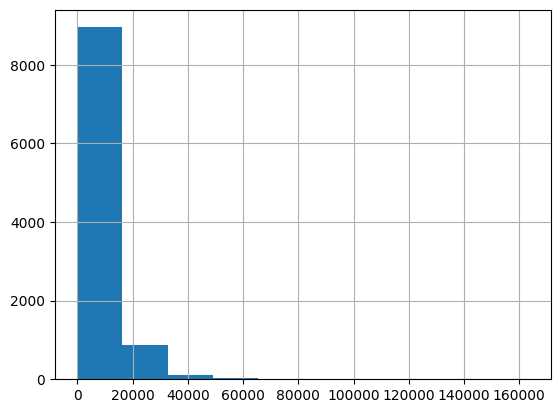

In [21]:
df['totmou'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7c9c86f6fb50>,
 'caps': [<matplotlib.lines.Line2D at 0x7c9c86fa00d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c9c86f6f8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c9c86fa0610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c9c86fa08b0>],
 'means': []}

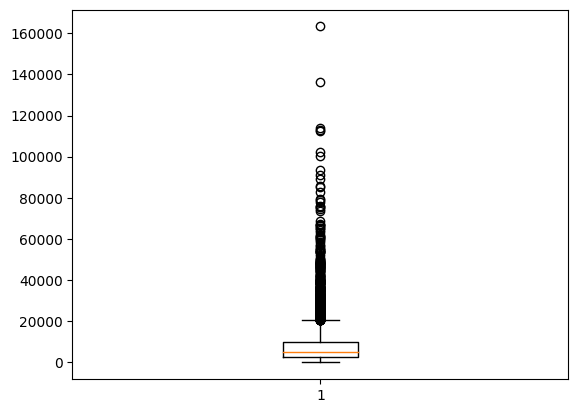

In [22]:
plt.boxplot(x=df['totmou'])

###**eqpdays**

Es una variable numérica que almacena el número de días (antigüedad) del equipo actual  

In [23]:
#Estadísticas de la variable
df['eqpdays'].describe()

count    10000.000000
mean       386.794500
std        252.720196
min         -5.000000
25%        210.000000
50%        338.000000
75%        522.000000
max       1823.000000
Name: eqpdays, dtype: float64

<Axes: >

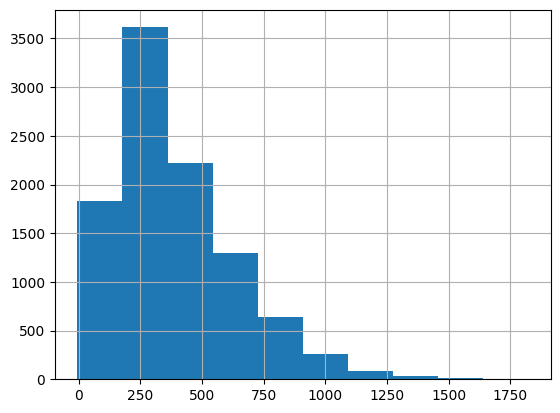

In [24]:
df['eqpdays'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7c9c86ea9240>,
 'caps': [<matplotlib.lines.Line2D at 0x7c9c86ea9780>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c9c86ea8fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c9c86ea9cc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c9c86ea9f60>],
 'means': []}

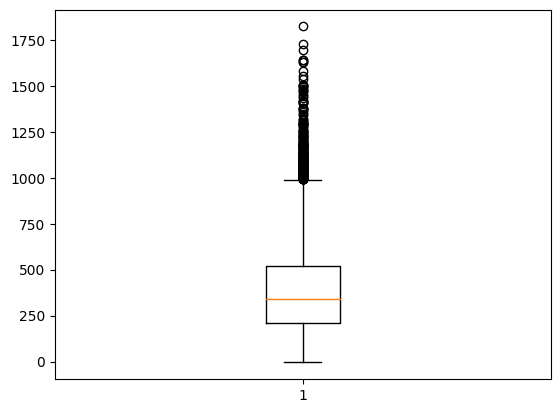

In [25]:
plt.boxplot(x=df['eqpdays'])

###**Customer_ID**

Es una variable numérica entera que identifica al cliente.  Cada ID es único  por tanto no se obtendrán valores estadísticos de este campo.  


In [26]:
df['Customer_ID'].nunique()

10000

## **Variables categóricas**

### **creditcd**
Es una variable categórica que muestra un indicador de aprobación de la tarjeta de crédito

In [27]:
#Categorías de la variable
df['creditcd'].unique()

array(['Y', 'N', nan], dtype=object)

In [28]:
df['creditcd'].value_counts()

creditcd
Y    6796
N    3052
Name: count, dtype: int64

<Axes: xlabel='creditcd'>

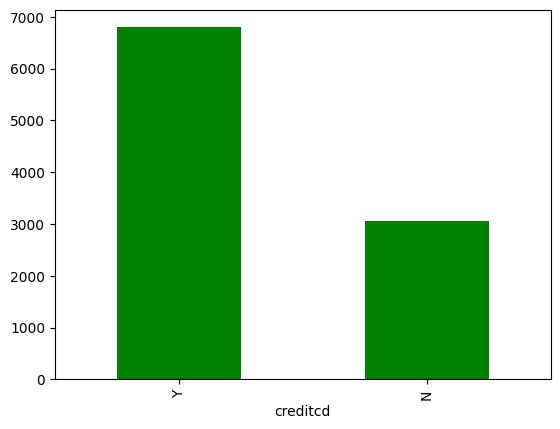

In [29]:
df['creditcd'].value_counts().plot(kind='bar', color='green')

---
# **Limpieza de los datos**
---

Debido a que en la variable ***creditcd*** existen valores válidos únicamente para 9848 registros, y los restantes corresponden a valores nulos, se eliminarán los registros con valores nulos para facilitar el análisis posterior de la base de datos.

In [30]:
df=df.dropna()
df

,totmou,totrev,creditcd,eqpdays,Customer_ID
0,7269.0,906.58,Y,371,1082423
1,13552.0,1172.25,N,83,1069232
2,4152.0,577.39,Y,675,1031705
3,1863.0,294.26,Y,218,1089806
4,4155.0,433.16,N,222,1076695
...,...,...,...,...,...
9995,2570.0,484.31,Y,611,1027614
9996,2105.0,583.36,Y,1243,1098422
9997,3690.0,294.29,Y,212,1096497
9998,3333.0,233.08,Y,290,1087248


---
# **Análisis comparativo**
---

Se quiere identificar si existe una relación entre el total de minutos usados por el cliente con la compañía y el ingreso total de los clientes, es decir, ¿Será posible afirmar que cuando una persona tiene un mayor ingreso, entonces es mayor la utilización de minutos o todo lo contrario?


Para ello se puede realizar el análisis mediante el cálculo del coeficiente de Pearson o de manera más gráfica mediante un diagrama de dispersión.

## **Coeficiente de Pearson**

Este indicador permite calcular un número entre -1 y 1, el cual entre más cercano a -1 o a 1 nos permitirá encontrar la relación inversa o directamente proporcional entre las dos variables.

In [33]:
correlation, p_value = pearsonr(df['totrev'], df['totmou'])

print("Coeficiente de correlación de Pearson:", correlation)
print("Valor p:", p_value)

Coeficiente de correlación de Pearson: 0.8352787141984754
Valor p: 0.0


## **Diagrama de dispersión**

Este diagrama despliega una gráfica de Ingresos totales Vs Minutos totales de uso del teléfono móvil.

In [31]:
df['indicadorTC']=df['creditcd']

<ipython-input-31-a5459f62f35a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['indicadorTC']=df['creditcd']


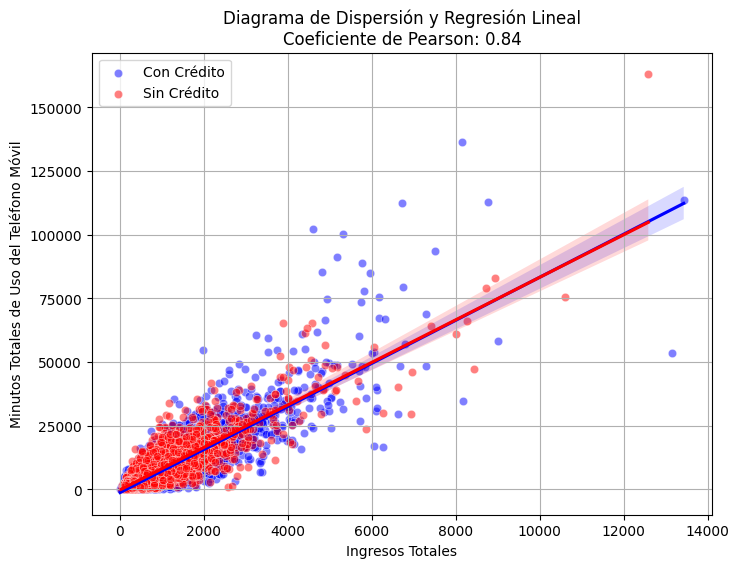

In [34]:
df_con_credito = df[df['creditcd'] == 'Y']
df_sin_credito = df[df['creditcd'] == 'N']

# Graficar el diagrama de dispersión con leyenda
plt.figure(figsize=(8, 6))
sns.scatterplot(x='totrev', y='totmou', data=df_con_credito, color='blue', alpha=0.5, label='Con Crédito')
sns.scatterplot(x='totrev', y='totmou', data=df_sin_credito, color='red', alpha=0.5, label='Sin Crédito')

# Agregar la línea de regresión lineal para cada grupo
sns.regplot(x='totrev', y='totmou', data=df_con_credito, scatter=False, color='blue')
sns.regplot(x='totrev', y='totmou', data=df_sin_credito, scatter=False, color='red')

# Añadir título y etiquetas
plt.title(f'Diagrama de Dispersión y Regresión Lineal\nCoeficiente de Pearson: {correlation:.2f}')
plt.xlabel('Ingresos Totales')
plt.ylabel('Minutos Totales de Uso del Teléfono Móvil')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()

---
# **Conclusiones**
---

- En el diagrama de dispersión se puede evidenciar que en la medida en la que los ingresos totales del cliente se incrementan, así mismo se incrementa el consumo.
- Del coeficente de Pearson tiene correlación positiva fuerte y significativa entre los ingresos totales de los clientes y los minutos totales de uso del teléfono móvil. Esto sugiere que existe una relación entre el comportamiento de gasto de los clientes y su uso del servicio de telefonía móvil, lo que podría ser útil para desarrollar estrategias comerciales y de marketing dirigidas a diferentes segmentos de clientes.
- Después de incluir una leyenda que indica si los clientes tienen o no crédito en el diagrama de dispersión, se observa que no hay una diferencia clara en la distribución de los puntos entre los clientes con y sin crédito. Esto sugiere que el hecho de tener crédito no parece afectar significativamente la relación entre las dos variables analizadas (minutos usados por el cliente e ingresos del cliente). Por lo tanto, basándonos en esta visualización, no podemos concluir que el tener crédito tenga un impacto notable en estas dos variables.